Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.87      0.90      7952
         yes       0.34      0.49      0.40      1091

    accuracy                           0.82      9043
   macro avg       0.63      0.68      0.65      9043
weighted avg       0.86      0.82      0.84      9043


Accuracy: 0.8248

Confusion Matrix:
[[6922 1030]
 [ 554  537]]

ROC-AUC Score: 0.8094


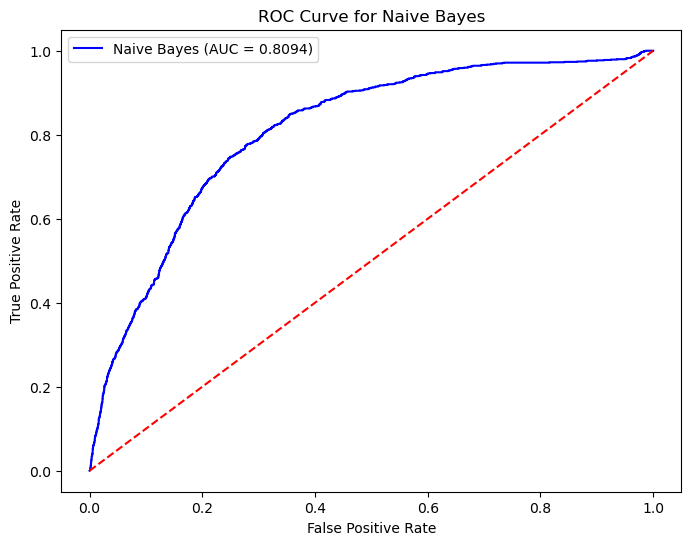

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

train_data = pd.read_csv('Train.csv')

X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64']).columns

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_split, y_train_split)

nb_predictions = naive_bayes_model.predict(X_test_split)

nb_probabilities = naive_bayes_model.predict_proba(X_test_split)[:, 1]  # Probabilities for class '1'

y_train_numeric = y_train_split.map({'no': 0, 'yes': 1})
y_test_numeric = y_test_split.map({'no': 0, 'yes': 1})

print("Classification Report:")
print(classification_report(y_test_split, nb_predictions))

accuracy = accuracy_score(y_test_split, nb_predictions)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_split, nb_predictions))

roc_auc = roc_auc_score(y_test_numeric, nb_probabilities)
fpr, tpr, thresholds = roc_curve(y_test_numeric, nb_probabilities)

print(f"\nROC-AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Naive Bayes (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()